Purely random strategies
------------------------

Optimizing a non convex problem is rather tricky, and furthermore the 
individual functions of the problem (numerator, denominator) do not seem to be
convex either. The problem is a 16 variables problem, thus looking at the 
utility function is not possible. 

For the above reasons, it was decided that sub group of memory one strategies 
will be studied individually. Initially, the most non complex set is analyzed
here. A set of memory one strategies where the cooperation probabilities will 
always be the same for each states, are called **purely random
strategies** here.

In [1]:
import sympy as sym
import numpy as np

sym.init_printing()

In [2]:
import opt_mo

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# the players probabilities
p, q_1, q_2, q_3, q_4 = sym.symbols("p, q_1, q_2, q_3, q_4", positive=True)

In [12]:
utility = opt_mo.utility((p, p, p, p), (q_1, q_2, q_3, q_4))

In [13]:
utility_den = sym.fraction(utility)[1]
utility_num = sym.fraction(utility)[0]

Thus the utility of a purely random strategy is the following:

$$ u = \frac{- p^{2} (q_{1} - q_{2} - 2 q_{3} + 2 q_{4}) - p (- q_{1} + 2 q_{2} + 5 q_{3} - 7 q_{4} - 1) + q_{2} - 5 q_{4} - 1}{p (q_{1} - q_{2} - q_{3} + q_{4}) + q_{2} - q_{4} - 1}$$

Here we will check the possible forms the utility function can have. Because is a ratio of order 2 and order 1, it can never be a function of an order greater than 2 and it can never be less that -1.

The cases that we have indenitfied are:

- linear
- quadratic
- constant
- hyperbolic polynomial

and the following analysis is going to be held for each case.
We will set the utility equal to the case, solve the equality and indentify the condition. Then check the condition based on the plots.

In [14]:
ns = sym.Poly(utility_num, p).coeffs()
ds = sym.Poly(utility_den, p).coeffs()

In [15]:
# creating all the symbols that will be used
a_2, a_1, a_0  = sym.symbols("a_2, a_1, a_0")

In [16]:
values = {'n_2': ns[0], 'n_1': ns[1], 'n_0': ns[2]}

In [17]:
values.update({'d_1': ds[0], 'd_0': ds[1]})
values

{'d_0': -q_2 + q_4 + 1,
 'd_1': -q_1 + q_2 + q_3 - q_4,
 'n_0': -q_2 + 5*q_4 + 1,
 'n_1': -q_1 + 2*q_2 + 5*q_3 - 7*q_4 - 1,
 'n_2': q_1 - q_2 - 2*q_3 + 2*q_4}

Constant
--------

If our utility is a constant then the following argument must hold:

$$ u = \frac{N}{D}= a_0$$

which implies

$$N = a_0 \times D $$

In [18]:
rhs = sym.Poly((utility_den * (a_0)), p)
rhs_coeffs = rhs.coeffs()
rhs_coeffs

In [19]:
lhs = sym.Poly(utility_num, p)
lhs_coeffs = lhs.coeffs()
lhs_coeffs

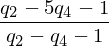

In [20]:
a_nought_con = list(sym.solveset(rhs_coeffs[1] - lhs_coeffs[2], a_0))[0]
a_nought_con

In [21]:
rhs_fraction = sym.fraction(rhs_coeffs[0].subs({a_0: a_nought_con}).simplify())
lhs_fraction = sym.fraction(lhs_coeffs[1].simplify())

In [22]:
constant_condition = (rhs_fraction[0] * lhs_fraction[1] - rhs_fraction[1] * lhs_fraction[0]).factor()
constant_condition.factor()

Thus for the constant case:
- $ -q_1 + q_2 + 2q_3 - 2q_4 = 0$
- $4q_1q_4 - q_2^2 - 4q_2q_3 + 3q_2q_4 + 2q_2 + 4q_3 - 2q_4^2 - 7q_4 -1 = 0$

Linear case
-----------

If our utility is linear then the following argument must hold:

$$ u = \frac{N}{D}= a_1 \times p +  a_0$$

which implies

$$N = (a_1 \times p + a_0) \times D $$

In [23]:
# the rhs (Denominator * linear equation)
rhs = sym.Poly((utility_den * (a_1 * p + a_0)), p)
rhs_coeffs = rhs.coeffs()
rhs_coeffs

In [24]:
# the lhs (Numerator)
lhs = sym.Poly(utility_num, p)
lhs_coeffs = lhs.coeffs()
lhs_coeffs

We solve our condition in order to retrive $a_1$. 

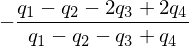

In [25]:
a_one_lin = list(sym.solveset(rhs_coeffs[0] - lhs_coeffs[0], a_1))[0]
a_one_lin

We solve our condition in order to retrive $a_0$. 

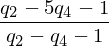

In [26]:
a_nought_lin = list(sym.solveset(rhs_coeffs[2] - lhs_coeffs[2], a_0))[0]
a_nought_lin

Now we will solve to get the condition for linearity. 

In [27]:
rhs_fraction = sym.fraction(rhs_coeffs[1].subs({a_1: a_one_lin, a_0: a_nought_lin}).simplify())
lhs_fraction = sym.fraction(lhs_coeffs[1].subs({a_1: a_one_lin, a_0: a_nought_lin}).simplify())

In [28]:
condition = (rhs_fraction[0] * lhs_fraction[1] - rhs_fraction[1] * lhs_fraction[0]).factor()

In [29]:
condition

In [30]:
constant_condition.collect((q_4, q_2))

**Optimisation**